### Modules import

In [1]:
import pandas as pd
from copairs.map import run_pipeline
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import logging
logging.basicConfig(format='%(levelname)s:%(asctime)s:%(name)s:%(message)s')
logging.getLogger("copairs").setLevel(logging.INFO)

### Reading the dataframe 
Batch 1 consists of plate with standard CP dye and other plate stained with Tocris Mitobrilliant dye

In [2]:
batch1_df = pd.read_csv('gct\\2023_05_15_Batch1\\2023_05_15_Batch1_normalized_feature_select_batch.csv.gz')

##### Batch 2 consists of plate stained with Phalloidin 400LS

In [3]:
batch2_df = pd.read_csv('gct\\2023_05_17_Batch2\\2023_05_17_Batch2_normalized_feature_select_batch.csv.gz')

##### Defining parameters to compute map

In [4]:
plate_col = 'Metadata_Plate'
well_col = 'Metadata_Well'
pert_col = 'Metadata_broad_sample'

#### First set of parameters which was not used since the analysis was done by plate which can be found later in the notebook

In [5]:
pos_sameby = [pert_col]
pos_diffby = []

neg_sameby = [plate_col]
neg_diffby = [pert_col]
null_size =10000

In [6]:
metadata_names = [c for c in batch1_df.columns if  c.startswith('Metadata')]
feature_names = [c for c in batch1_df.columns if not c.startswith('Metadata')]
feats = batch1_df[feature_names].values
dframe = batch1_df[metadata_names]

In [7]:
result = run_pipeline(dframe, feats, 
                      pos_sameby, pos_diffby,
                      neg_sameby, neg_diffby,
                      null_size
                     )

INFO:2023-07-11 14:22:23,022:copairs:Indexing metadata...
INFO:2023-07-11 14:22:23,027:copairs:Finding positive pairs...
INFO:2023-07-11 14:22:23,028:copairs:dropping dups...
INFO:2023-07-11 14:22:23,032:copairs:Finding negative pairs...
INFO:2023-07-11 14:22:23,074:copairs:dropping dups...
INFO:2023-07-11 14:22:23,166:copairs:Computing positive similarities...


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:2023-07-11 14:22:23,854:copairs:Computing negative similarities...


  0%|          | 0/8 [00:00<?, ?it/s]

INFO:2023-07-11 14:22:26,584:copairs:Building rank lists...
INFO:2023-07-11 14:22:26,783:copairs:Computing average precision...
INFO:2023-07-11 14:22:26,793:copairs:Computing null distributions...
INFO:2023-07-11 14:22:28,185:copairs:Computing P-values...
INFO:2023-07-11 14:22:28,196:copairs:Creating result DataFrame...
INFO:2023-07-11 14:22:28,199:copairs:Finished.


In [8]:
result

,Metadata_plate_map_name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_BRD ID,Metadata_BRD with batch,Metadata_Common Name,Metadata_MoA,Metadata_Plate,Metadata_Well,Metadata_Site_Count,Metadata_Count_Cells,Metadata_Count_Cytoplasm,Metadata_Count_Nuclei,Metadata_Object_Count,Metadata_batch,p_value,average_precision
0,S-C-7314-04-CMP-001,BRD-K62391742-001-19-9,4.3422,5.0,DMSO,K62391742,BRD-K62391742-001-03-0,venetoclax,BCL inhibitor,BR00122250,A01,9,3121,3121,3121,3121,2023_05_15_Batch1,0.020398,0.125965
1,S-C-7314-04-CMP-001,BRD-K19477839-001-10-9,1.7970,5.0,DMSO,K19477839,BRD-K19477839-001-07-6,SGX523,hepatocyte growth factor receptor inhibitor,BR00122250,A02,9,3804,3804,3804,3804,2023_05_15_Batch1,0.024098,0.107854
2,S-C-7314-04-CMP-001,BRD-K54759182-003-09-8,1.6595,5.0,DMSO,K54759182,BRD-K54759182-003-08-0,dosulepin,tricyclic antidepressant,BR00122250,A03,9,3766,3766,3766,3766,2023_05_15_Batch1,0.262674,0.033022
3,S-C-7314-04-CMP-001,BRD-K70642949-001-06-9,2.3130,5.0,DMSO,K70642949,BRD-K70642949-001-04-5,GSK2334470,phosphoinositide dependent kinase inhibitor,BR00122250,A04,9,2922,2922,2922,2922,2023_05_15_Batch1,0.000100,0.878419
4,S-C-7314-04-CMP-001,BRD-K73397362-001-09-9,2.6031,5.0,DMSO,K73397362,BRD-K73397362-001-06-6,purmorphamine,smoothened receptor agonist,BR00122250,A05,9,3971,3971,3971,3971,2023_05_15_Batch1,0.000200,0.348926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,S-C-7314-04-CMP-001,BRD-K63631219-001-01-6,1.1784,5.0,DMSO,K63631219,BRD-K63631219-001-01-6,quazinone,phosphodiesterase inhibitor,BR00122246,P20,9,3899,3899,3899,3899,2023_05_15_Batch1,0.217278,0.037031
763,S-C-7314-04-CMP-001,BRD-K13094524-001-10-9,1.7369,5.0,DMSO,K13094524,BRD-K13094524-001-04-2,PFI-1,bromodomain inhibitor,BR00122246,P21,9,3614,3614,3614,3614,2023_05_15_Batch1,0.022498,0.125007
764,S-C-7314-04-CMP-001,BRD-K82941592-238-06-9,2.6182,5.0,DMSO,K82941592,BRD-K82941592-238-03-7,rosuvastatin,HMGCR inhibitor,BR00122246,P22,9,3995,3995,3995,3995,2023_05_15_Batch1,0.077392,0.062878
765,S-C-7314-04-CMP-001,NaN,NaN,NaN,DMSO,NaN,NaN,NaN,NaN,BR00122246,P23,9,4099,4099,4099,4099,2023_05_15_Batch1,0.000100,NaN


In [9]:
from copairs.map import aggregate
agg_result = aggregate(result, sameby=pos_sameby, threshold=0.05)
agg_result

,Metadata_broad_sample,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
0,BRD-A12994259-001-11-9,0.067567,1.066601,0.102939,0.987419,False,False
1,BRD-A22769835-300-05-7,0.046448,0.796804,0.173619,0.760404,False,False
2,BRD-A53576514-048-02-8,0.109081,1.572797,0.040114,1.396705,True,True
3,BRD-A87435144-001-01-6,0.175087,2.267519,0.009002,2.045670,True,True
4,BRD-K00818915-001-02-9,0.158747,2.063098,0.013898,1.857043,True,True
...,...,...,...,...,...,...,...
85,BRD-K98251413-001-07-9,0.136686,1.827362,0.023092,1.636548,True,True
86,BRD-K99092662-001-02-9,0.098341,1.297017,0.068815,1.162318,False,False
87,BRD-K99113996-001-02-0,1.000000,4.000043,0.000387,3.412163,True,True
88,BRD-K99433989-001-02-9,0.398845,3.031117,0.001821,2.739632,True,True


In [10]:
agg_result.head(10)

,Metadata_broad_sample,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
0,BRD-A12994259-001-11-9,0.067567,1.066601,0.102939,0.987419,False,False
1,BRD-A22769835-300-05-7,0.046448,0.796804,0.173619,0.760404,False,False
2,BRD-A53576514-048-02-8,0.109081,1.572797,0.040114,1.396705,True,True
3,BRD-A87435144-001-01-6,0.175087,2.267519,0.009002,2.045670,True,True
4,BRD-K00818915-001-02-9,0.158747,2.063098,0.013898,1.857043,True,True
5,BRD-K01826510-001-09-9,0.096330,1.403387,0.055549,1.255325,True,False
6,BRD-K02965346-001-01-8,0.774620,4.000043,0.000387,3.412163,True,True
7,BRD-K03063480-001-08-9,0.424831,3.797137,0.000435,3.361409,True,True
8,BRD-K04923131-001-17-9,1.000000,4.000043,0.000387,3.412163,True,True
9,BRD-K06182768-001-02-3,0.047141,0.763032,0.182722,0.738208,False,False


#### Analysis-Plate wise - to see the mAP only in the standard CellPainting plate 

In [11]:
pos_sameby = [pert_col]
pos_diffby = []

neg_sameby = []
neg_diffby = [pert_col]
null_size =10000

#### Batch1 - Standard Cell Painting data (the mito stained plate removed)

#### Splitting the dataframe into standard  CP dyes and the mito dyes 

In [12]:
batch1_df.shape

(767, 722)

In [13]:
std_data = batch1_df.loc[batch1_df['Metadata_Plate'] == 'BR00122250']

In [14]:
std_data.shape

(384, 722)

In [15]:
mito_data = batch1_df.loc[batch1_df['Metadata_Plate'] == 'BR00122246']

In [16]:
mito_data.shape

(383, 722)

In [17]:
batch2_df.shape

(384, 720)

In [18]:
metadata_names_std = [c for c in std_data.columns if  c.startswith('Metadata')]
feature_names_std = [c for c in std_data.columns if not c.startswith('Metadata')]
feats_std = std_data[feature_names_std].values
dframe_std = std_data[metadata_names_std]
result_std = run_pipeline(dframe_std, feats_std, 
                      pos_sameby, pos_diffby,
                      neg_sameby, neg_diffby,
                      null_size
                     )

INFO:2023-07-11 14:22:28,981:copairs:Indexing metadata...
INFO:2023-07-11 14:22:28,987:copairs:Finding positive pairs...
INFO:2023-07-11 14:22:28,988:copairs:dropping dups...
INFO:2023-07-11 14:22:28,990:copairs:Finding negative pairs...
INFO:2023-07-11 14:22:29,091:copairs:dropping dups...
INFO:2023-07-11 14:22:29,148:copairs:Computing positive similarities...


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:2023-07-11 14:22:29,774:copairs:Computing negative similarities...


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:2023-07-11 14:22:31,242:copairs:Building rank lists...
INFO:2023-07-11 14:22:31,330:copairs:Computing average precision...
INFO:2023-07-11 14:22:31,339:copairs:Computing null distributions...
INFO:2023-07-11 14:22:32,241:copairs:Computing P-values...
INFO:2023-07-11 14:22:32,251:copairs:Creating result DataFrame...
INFO:2023-07-11 14:22:32,254:copairs:Finished.


In [19]:
from copairs.map import aggregate
agg_result_std = aggregate(result_std, sameby=pos_sameby, threshold=0.05)
agg_result_std

,Metadata_broad_sample,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
0,BRD-A12994259-001-11-9,0.109555,1.226598,0.087562,1.057685,False,False
1,BRD-A22769835-300-05-7,0.011390,0.229197,0.603341,0.219437,False,False
2,BRD-A53576514-048-02-8,0.046175,0.987078,0.138886,0.857340,False,False
3,BRD-A87435144-001-01-6,0.106790,1.454494,0.055446,1.256126,True,False
4,BRD-K00818915-001-02-9,0.189290,1.650106,0.035971,1.444051,True,True
...,...,...,...,...,...,...,...
85,BRD-K98251413-001-07-9,0.034381,0.734570,0.224099,0.649559,False,False
86,BRD-K99092662-001-02-9,0.181962,1.441254,0.056177,1.250440,True,False
87,BRD-K99113996-001-02-0,1.000000,4.000043,0.000346,3.460774,True,True
88,BRD-K99433989-001-02-9,0.162272,1.729883,0.031629,1.499916,True,True


##### Mito data 

In [20]:
metadata_names_mito = [c for c in mito_data.columns if  c.startswith('Metadata')]
feature_names_mito = [c for c in mito_data.columns if not c.startswith('Metadata')]
feats_mito = mito_data[feature_names_mito].values
dframe_mito = mito_data[metadata_names_mito]
result_mito = run_pipeline(dframe_mito, feats_mito, 
                      pos_sameby, pos_diffby,
                      neg_sameby, neg_diffby,
                      null_size
                     )

INFO:2023-07-11 14:22:32,443:copairs:Indexing metadata...
INFO:2023-07-11 14:22:32,447:copairs:Finding positive pairs...
INFO:2023-07-11 14:22:32,449:copairs:dropping dups...
INFO:2023-07-11 14:22:32,451:copairs:Finding negative pairs...
INFO:2023-07-11 14:22:32,552:copairs:dropping dups...
INFO:2023-07-11 14:22:32,623:copairs:Computing positive similarities...


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:2023-07-11 14:22:33,216:copairs:Computing negative similarities...


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:2023-07-11 14:22:34,405:copairs:Building rank lists...
INFO:2023-07-11 14:22:34,517:copairs:Computing average precision...
INFO:2023-07-11 14:22:34,525:copairs:Computing null distributions...
INFO:2023-07-11 14:22:35,510:copairs:Computing P-values...
INFO:2023-07-11 14:22:35,516:copairs:Creating result DataFrame...
INFO:2023-07-11 14:22:35,518:copairs:Finished.


In [21]:
agg_result_mito = aggregate(result_mito, sameby=pos_sameby, threshold=0.05)
agg_result_mito

,Metadata_broad_sample,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
0,BRD-A12994259-001-11-9,0.041064,0.906276,0.155108,0.809366,False,False
1,BRD-A22769835-300-05-7,0.029497,0.737172,0.208662,0.680557,False,False
2,BRD-A53576514-048-02-8,0.183302,1.846767,0.024630,1.608528,True,True
3,BRD-A87435144-001-01-6,0.078665,1.200097,0.086021,1.065398,False,False
4,BRD-K00818915-001-02-9,0.189756,1.634259,0.038689,1.412410,True,True
...,...,...,...,...,...,...,...
85,BRD-K98251413-001-07-9,0.207946,1.956817,0.020288,1.692771,True,True
86,BRD-K99092662-001-02-9,0.038368,0.745671,0.207242,0.683523,False,False
87,BRD-K99113996-001-02-0,1.000000,4.000043,0.000429,3.368020,True,True
88,BRD-K99433989-001-02-9,0.698810,3.699013,0.000642,3.192367,True,True


##### Batch2 - Lond stoke shifted actin 

In [22]:
metadata_names_2 = [c for c in batch2_df.columns if  c.startswith('Metadata')]
feature_names_2 = [c for c in batch2_df.columns if not c.startswith('Metadata')]
feats_2 = batch2_df[feature_names_2].values
dframe_2 = batch2_df[metadata_names_2]
result_batch2 = run_pipeline(dframe_2, feats_2, 
                      pos_sameby, pos_diffby,
                      neg_sameby, neg_diffby,
                      null_size
                     )

INFO:2023-07-11 14:22:35,690:copairs:Indexing metadata...
INFO:2023-07-11 14:22:35,694:copairs:Finding positive pairs...
INFO:2023-07-11 14:22:35,697:copairs:dropping dups...
INFO:2023-07-11 14:22:35,699:copairs:Finding negative pairs...
INFO:2023-07-11 14:22:35,803:copairs:dropping dups...
INFO:2023-07-11 14:22:35,862:copairs:Computing positive similarities...


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:2023-07-11 14:22:36,436:copairs:Computing negative similarities...


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:2023-07-11 14:22:37,591:copairs:Building rank lists...
INFO:2023-07-11 14:22:37,679:copairs:Computing average precision...
INFO:2023-07-11 14:22:37,687:copairs:Computing null distributions...
INFO:2023-07-11 14:22:38,437:copairs:Computing P-values...
INFO:2023-07-11 14:22:38,443:copairs:Creating result DataFrame...
INFO:2023-07-11 14:22:38,446:copairs:Finished.


In [23]:
result_batch2

,Metadata_plate_map_name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_BRD ID,Metadata_BRD with batch,Metadata_Common Name,Metadata_MoA,Metadata_Plate,Metadata_Well,Metadata_Site_Count,Metadata_Count_Cells,Metadata_Count_Cytoplasm,Metadata_Count_Nuclei,Metadata_Object_Count,Metadata_batch,p_value,average_precision
0,S-C-7314-04-CMP-001,BRD-K62391742-001-19-9,4.3422,5.0,DMSO,K62391742,BRD-K62391742-001-03-0,venetoclax,BCL inhibitor,BR00122247,A01,9,3361,3361,3361,3361,2023_05_17_Batch2,0.037896,0.085662
1,S-C-7314-04-CMP-001,BRD-K19477839-001-10-9,1.7970,5.0,DMSO,K19477839,BRD-K19477839-001-07-6,SGX523,hepatocyte growth factor receptor inhibitor,BR00122247,A02,9,4012,4012,4012,4012,2023_05_17_Batch2,0.218378,0.023813
2,S-C-7314-04-CMP-001,BRD-K54759182-003-09-8,1.6595,5.0,DMSO,K54759182,BRD-K54759182-003-08-0,dosulepin,tricyclic antidepressant,BR00122247,A03,9,4048,4048,4048,4048,2023_05_17_Batch2,0.559944,0.011738
3,S-C-7314-04-CMP-001,BRD-K70642949-001-06-9,2.3130,5.0,DMSO,K70642949,BRD-K70642949-001-04-5,GSK2334470,phosphoinositide dependent kinase inhibitor,BR00122247,A04,9,3239,3239,3239,3239,2023_05_17_Batch2,0.000100,0.766667
4,S-C-7314-04-CMP-001,BRD-K73397362-001-09-9,2.6031,5.0,DMSO,K73397362,BRD-K73397362-001-06-6,purmorphamine,smoothened receptor agonist,BR00122247,A05,9,3955,3955,3955,3955,2023_05_17_Batch2,0.001000,0.380556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,S-C-7314-04-CMP-001,BRD-K63631219-001-01-6,1.1784,5.0,DMSO,K63631219,BRD-K63631219-001-01-6,quazinone,phosphodiesterase inhibitor,BR00122247,P20,9,3836,3836,3836,3836,2023_05_17_Batch2,0.747025,0.009178
380,S-C-7314-04-CMP-001,BRD-K13094524-001-10-9,1.7369,5.0,DMSO,K13094524,BRD-K13094524-001-04-2,PFI-1,bromodomain inhibitor,BR00122247,P21,9,3505,3505,3505,3505,2023_05_17_Batch2,0.026697,0.115467
381,S-C-7314-04-CMP-001,BRD-K82941592-238-06-9,2.6182,5.0,DMSO,K82941592,BRD-K82941592-238-03-7,rosuvastatin,HMGCR inhibitor,BR00122247,P22,9,3974,3974,3974,3974,2023_05_17_Batch2,0.038396,0.082583
382,S-C-7314-04-CMP-001,NaN,NaN,NaN,DMSO,NaN,NaN,NaN,NaN,BR00122247,P23,9,4048,4048,4048,4048,2023_05_17_Batch2,NaN,NaN


In [24]:
agg_result_act = aggregate(result_batch2, sameby=pos_sameby, threshold=0.05)
agg_result_act

,Metadata_broad_sample,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
0,BRD-A12994259-001-11-9,0.118931,1.291960,0.075933,1.119569,False,False
1,BRD-A22769835-300-05-7,0.023822,0.644525,0.251902,0.598768,False,False
2,BRD-A53576514-048-02-8,0.059661,1.139771,0.101568,0.993244,False,False
3,BRD-A87435144-001-01-6,0.133939,1.670712,0.035574,1.448863,True,True
4,BRD-K00818915-001-02-9,0.071897,1.248047,0.081998,1.086196,False,False
...,...,...,...,...,...,...,...
85,BRD-K98251413-001-07-9,0.218591,2.057218,0.016100,1.793171,True,True
86,BRD-K99092662-001-02-9,0.111170,0.912416,0.159580,0.797023,False,False
87,BRD-K99113996-001-02-0,1.000000,4.000043,0.000529,3.276250,True,True
88,BRD-K99433989-001-02-9,0.354452,2.754766,0.003681,2.433991,True,True


#### Renaming columns

In [25]:
agg_result_std = agg_result_std.rename(columns = {'average_precision': 'average_precision_std'})
agg_result_mito = agg_result_mito.rename(columns = {'average_precision':'average_precision_mito'})
agg_result_act = agg_result_act.rename(columns = {'average_precision':'average_precision_act'})

#### Combining the average precision values into a single dataframe

In [26]:
agg_result_std_subset = agg_result_std[['Metadata_broad_sample', 'average_precision_std']]
agg_result_mito_subset = agg_result_mito[['Metadata_broad_sample', 'average_precision_mito']]
agg_result_act = agg_result_act[['Metadata_broad_sample', 'average_precision_act']]

In [27]:
combined_df = pd.merge(agg_result_std_subset, agg_result_mito_subset, on='Metadata_broad_sample')
combined_df  =pd.merge(combined_df,agg_result_act, on='Metadata_broad_sample')

In [28]:
combined_df

,Metadata_broad_sample,average_precision_std,average_precision_mito,average_precision_act
0,BRD-A12994259-001-11-9,0.109555,0.041064,0.118931
1,BRD-A22769835-300-05-7,0.011390,0.029497,0.023822
2,BRD-A53576514-048-02-8,0.046175,0.183302,0.059661
3,BRD-A87435144-001-01-6,0.106790,0.078665,0.133939
4,BRD-K00818915-001-02-9,0.189290,0.189756,0.071897
...,...,...,...,...
85,BRD-K98251413-001-07-9,0.034381,0.207946,0.218591
86,BRD-K99092662-001-02-9,0.181962,0.038368,0.111170
87,BRD-K99113996-001-02-0,1.000000,1.000000,1.000000
88,BRD-K99433989-001-02-9,0.162272,0.698810,0.354452


#### Adding metadata information to the combined_df 

In [29]:
moa_metadata = pd.read_csv('C:\\Users\\ssivagur\\Documents\\Cell_painting_projects\\CDoT\\Batch1\\LC00009948_MoA_Common_Names.csv')
moa_metadata = moa_metadata.rename(columns = {'BRD with batch':'Metadata_broad_sample'})

##### Extracting BRD ID from BROAD sample name 

In [30]:
def BRD_ID(i):
    if type(i) != float:
        ID = i.split('-')
        return ID[1]



In [31]:
combined_df['BRD ID'] = combined_df['Metadata_broad_sample'].map(BRD_ID)
combined_moa_df = pd.merge(combined_df,moa_metadata, on = 'BRD ID')

In [32]:
combined_moa_df.head(30)

,Metadata_broad_sample_x,average_precision_std,average_precision_mito,average_precision_act,BRD ID,Metadata_broad_sample_y,Common Name,MoA
0,BRD-A12994259-001-11-9,0.109555,0.041064,0.118931,A12994259,BRD-A12994259-001-02-1,pomalidomide,tumor necrosis factor production inhibitor
1,BRD-A22769835-300-05-7,0.011390,0.029497,0.023822,A22769835,BRD-A22769835-300-05-7,homochlorcyclizine,antihistamine
2,BRD-A53576514-048-02-8,0.046175,0.183302,0.059661,A53576514,BRD-A53576514-048-14-3,orphenadrine,acetylcholine receptor antagonist
3,BRD-A87435144-001-01-6,0.106790,0.078665,0.133939,A87435144,BRD-A87435144-001-01-6,AZD7545,pyruvate dehydrogenase kinase inhibitor
4,BRD-K00818915-001-02-9,0.189290,0.189756,0.071897,K00818915,BRD-K00818915-003-01-8,SHP099,protein tyrosine kinase inhibitor
5,BRD-K01826510-001-09-9,0.037976,0.074683,0.018357,K01826510,BRD-K01826510-300-06-9,hydroxyzine,antihistamine
6,BRD-K02965346-001-01-8,0.916667,0.566919,0.858631,K02965346,BRD-K02965346-001-07-5,SU-11274,hepatocyte growth factor receptor inhibitor
7,BRD-K03063480-001-08-9,0.958333,0.580847,0.740972,K03063480,BRD-K03063480-001-06-6,PF-477736,CHK inhibitor
8,BRD-K04923131-001-17-9,1.000000,1.000000,0.586369,K04923131,BRD-K04923131-001-15-4,GSK-3-inhibitor-IX,glycogen synthase kinase inhibitor
9,BRD-K06182768-001-02-3,0.010157,0.062980,0.026257,K06182768,BRD-K06182768-001-06-4,A-366,histone lysine methyltransferase inhibitor


#### Standard cellpainting data vs mito 

In [33]:
mito_fig =px.scatter(combined_moa_df, x =combined_moa_df['average_precision_std'], y=combined_moa_df['average_precision_mito'],labels={'average_precision_std':'Mean average precision - Standard CellPainting dyes', 'average_precision_mito':'Mean average precision - <br> Tocris Mitobrilliant 647'}, color=combined_moa_df['MoA'])
mito_fig.update_layout(legend=dict(orientation="h"), height=800, width=1000)

#### Standard cellpainting data vs Actin 

In [34]:
actin_fig = px.scatter(combined_moa_df, x =combined_moa_df['average_precision_std'], y=combined_moa_df['average_precision_act'],labels={'average_precision_std':'Mean Average Precision - Standard CellPainting dyes', 'average_precision_act':'Mean Average Preicison - <br> Phalloidin 400LS (long-stoke shifted)'}, color=combined_moa_df['MoA'])
actin_fig.update_layout(legend=dict(orientation="h"), height=800, width=1000)

In [35]:
combined_moa_df

,Metadata_broad_sample_x,average_precision_std,average_precision_mito,average_precision_act,BRD ID,Metadata_broad_sample_y,Common Name,MoA
0,BRD-A12994259-001-11-9,0.109555,0.041064,0.118931,A12994259,BRD-A12994259-001-02-1,pomalidomide,tumor necrosis factor production inhibitor
1,BRD-A22769835-300-05-7,0.011390,0.029497,0.023822,A22769835,BRD-A22769835-300-05-7,homochlorcyclizine,antihistamine
2,BRD-A53576514-048-02-8,0.046175,0.183302,0.059661,A53576514,BRD-A53576514-048-14-3,orphenadrine,acetylcholine receptor antagonist
3,BRD-A87435144-001-01-6,0.106790,0.078665,0.133939,A87435144,BRD-A87435144-001-01-6,AZD7545,pyruvate dehydrogenase kinase inhibitor
4,BRD-K00818915-001-02-9,0.189290,0.189756,0.071897,K00818915,BRD-K00818915-003-01-8,SHP099,protein tyrosine kinase inhibitor
...,...,...,...,...,...,...,...,...
85,BRD-K98251413-001-07-9,0.034381,0.207946,0.218591,K98251413,BRD-K98251413-001-04-0,IOX2,hypoxia inducible factor inhibitor
86,BRD-K99092662-001-02-9,0.181962,0.038368,0.111170,K99092662,BRD-K99092662-001-01-1,PS178990,androgen receptor modulator
87,BRD-K99113996-001-02-0,1.000000,1.000000,1.000000,K99113996,BRD-K99113996-001-02-0,AZD2014,mTOR inhibitor
88,BRD-K99433989-001-02-9,0.162272,0.698810,0.354452,K99433989,BRD-K99433989-001-02-9,SAG,smoothened receptor agonist


#### Creating a column to have the difference in the mAP values

In [36]:
combined_moa_df['std_vs_act'] = combined_moa_df['average_precision_std'] - combined_moa_df['average_precision_act']

In [37]:
combined_moa_df['std_vs_mito'] = combined_moa_df['average_precision_std'] - combined_moa_df['average_precision_mito']

In [38]:
combined_moa_df

,Metadata_broad_sample_x,average_precision_std,average_precision_mito,average_precision_act,BRD ID,Metadata_broad_sample_y,Common Name,MoA,std_vs_act,std_vs_mito
0,BRD-A12994259-001-11-9,0.109555,0.041064,0.118931,A12994259,BRD-A12994259-001-02-1,pomalidomide,tumor necrosis factor production inhibitor,-0.009376,0.068491
1,BRD-A22769835-300-05-7,0.011390,0.029497,0.023822,A22769835,BRD-A22769835-300-05-7,homochlorcyclizine,antihistamine,-0.012432,-0.018106
2,BRD-A53576514-048-02-8,0.046175,0.183302,0.059661,A53576514,BRD-A53576514-048-14-3,orphenadrine,acetylcholine receptor antagonist,-0.013486,-0.137127
3,BRD-A87435144-001-01-6,0.106790,0.078665,0.133939,A87435144,BRD-A87435144-001-01-6,AZD7545,pyruvate dehydrogenase kinase inhibitor,-0.027149,0.028125
4,BRD-K00818915-001-02-9,0.189290,0.189756,0.071897,K00818915,BRD-K00818915-003-01-8,SHP099,protein tyrosine kinase inhibitor,0.117393,-0.000466
...,...,...,...,...,...,...,...,...,...,...
85,BRD-K98251413-001-07-9,0.034381,0.207946,0.218591,K98251413,BRD-K98251413-001-04-0,IOX2,hypoxia inducible factor inhibitor,-0.184210,-0.173566
86,BRD-K99092662-001-02-9,0.181962,0.038368,0.111170,K99092662,BRD-K99092662-001-01-1,PS178990,androgen receptor modulator,0.070791,0.143594
87,BRD-K99113996-001-02-0,1.000000,1.000000,1.000000,K99113996,BRD-K99113996-001-02-0,AZD2014,mTOR inhibitor,0.000000,0.000000
88,BRD-K99433989-001-02-9,0.162272,0.698810,0.354452,K99433989,BRD-K99433989-001-02-9,SAG,smoothened receptor agonist,-0.192180,-0.536537


#### Creating a dataframe for just actin alone

In [39]:
diff_actin_df = combined_moa_df[['average_precision_std','average_precision_act','BRD ID', 'MoA', 'std_vs_act']]

In [40]:
diff_actin_df.sort_values(by=['std_vs_act'])

,average_precision_std,average_precision_act,BRD ID,MoA,std_vs_act
36,0.342176,0.979167,K39974922,FGFR inhibitor,-0.636991
76,0.340228,0.820833,K86118762,IGF-1 inhibitor,-0.480605
16,0.565424,1.000000,K16189898,glycogen synthase kinase inhibitor,-0.434576
47,0.587572,1.000000,K57080016,MEK inhibitor,-0.412428
60,0.227046,0.542571,K70446295,protein arginine N-methyltransferase inhibitor,-0.315525
...,...,...,...,...,...
8,1.000000,0.586369,K04923131,glycogen synthase kinase inhibitor,0.413631
49,0.916667,0.429167,K61397605,HDAC inhibitor,0.487500
89,0.938889,0.450754,M87138257,hypoxia inducible factor inhibitor,0.488135
54,0.885417,0.384917,K66401437,CDK inhibitor,0.500500


In [41]:
fig = px.bar(diff_actin_df, x='MoA', y='std_vs_act', labels={'std_vs_act':'Difference in mAP with standard <br> CP dyes and phalloidin 400LS', 'MoA':''})
fig.update_xaxes(tickangle=90, categoryorder='total ascending')
fig.update_layout(height=800,font_family='Arial', font=dict(size=14, color='Black'))

In [42]:
px.histogram(diff_actin_df, x ='std_vs_act')

#### Absolute values

In [43]:
diff_actin_df_abs = diff_actin_df.iloc[:,0:4]

In [44]:
diff_actin_df_abs['abs_values'] = abs(combined_moa_df['average_precision_std'] - combined_moa_df['average_precision_act'])

In [45]:
diff_actin_df_abs.sort_values(by=['abs_values'], ascending=False)

,average_precision_std,average_precision_act,BRD ID,MoA,abs_values
36,0.342176,0.979167,K39974922,FGFR inhibitor,0.636991
46,1.000000,0.439680,K56932272,inosine monophosphate dehydrogenase inhibitor,0.560320
54,0.885417,0.384917,K66401437,CDK inhibitor,0.500500
89,0.938889,0.450754,M87138257,hypoxia inducible factor inhibitor,0.488135
49,0.916667,0.429167,K61397605,HDAC inhibitor,0.487500
...,...,...,...,...,...
74,1.000000,1.000000,K85606544,EGFR inhibitor,0.000000
73,1.000000,1.000000,K84937637,mTOR inhibitor,0.000000
59,1.000000,1.000000,K69023402,ER stressor (SERCA inhibitor),0.000000
83,1.000000,1.000000,K97452254,CDK inhibitor,0.000000


In [46]:
fig = px.bar(diff_actin_df_abs, x=diff_actin_df_abs['MoA'], y=diff_actin_df_abs['abs_values'], orientation='v')
fig.update_xaxes(categoryorder='total ascending', tickangle=90)
fig.update_layout(height=1000, font=dict(size=18))

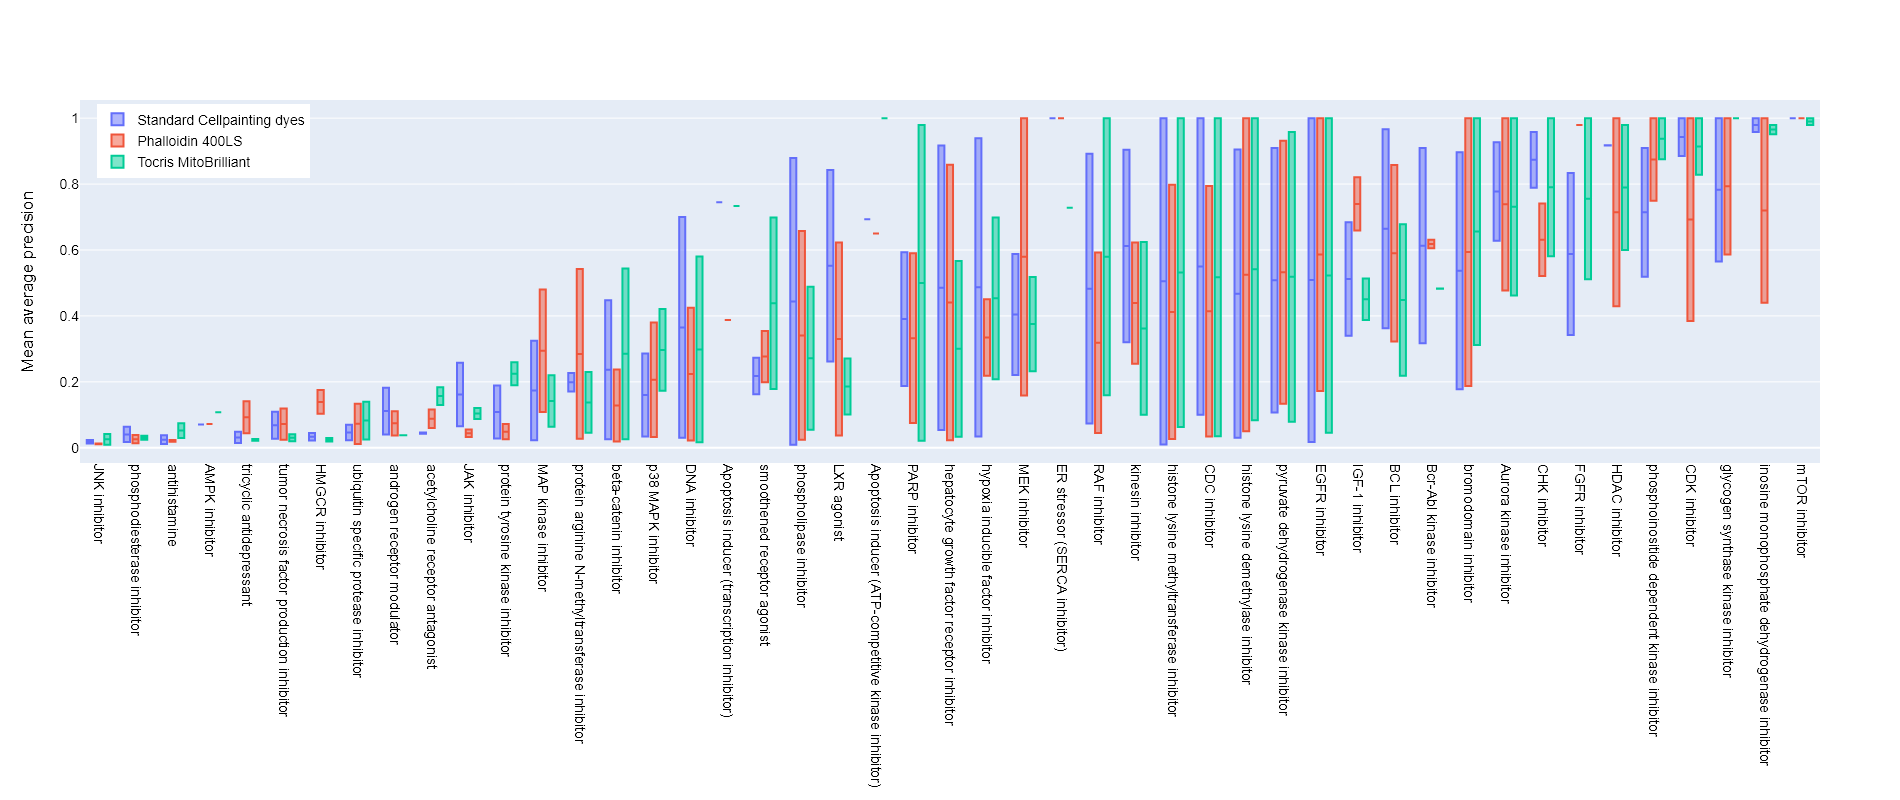

In [47]:
box_plot = go.Figure()
box_plot.add_trace(go.Box(x=combined_moa_df['MoA'], y=combined_moa_df['average_precision_std'], name = 'Standard Cellpainting dyes'))
box_plot.add_trace(go.Box(x=combined_moa_df['MoA'], y=combined_moa_df['average_precision_act'], name = 'Phalloidin 400LS'))
box_plot.add_trace(go.Box(x=combined_moa_df['MoA'], y=combined_moa_df['average_precision_mito'], name = 'Tocris MitoBrilliant'))
box_plot.update_layout(height=800,width=1900, font_family='Arial', font=dict(size=14, color='Black'), boxmode='group',yaxis_title = 'Mean average precision',  legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01))
box_plot.update_xaxes(tickangle=90, categoryorder='total ascending')
box_plot.show('png')